Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/4W1C_rel_poseX
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/4W1C_rel_poseY
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/2W1C_rel_poseX
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/2W1C_rel_poseY
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/4W_rel_poseX
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/4W_rel_poseY
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/2W_rel_poseX
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/2W_rel_poseY
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/4W1C_rel_vel_lin
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/2W1C_rel_vel_lin
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/4W_rel_vel_lin
Loading file: /home/asalvi/code_workspace/tmp/RedRes/Data4Plot/2W_rel_vel_lin


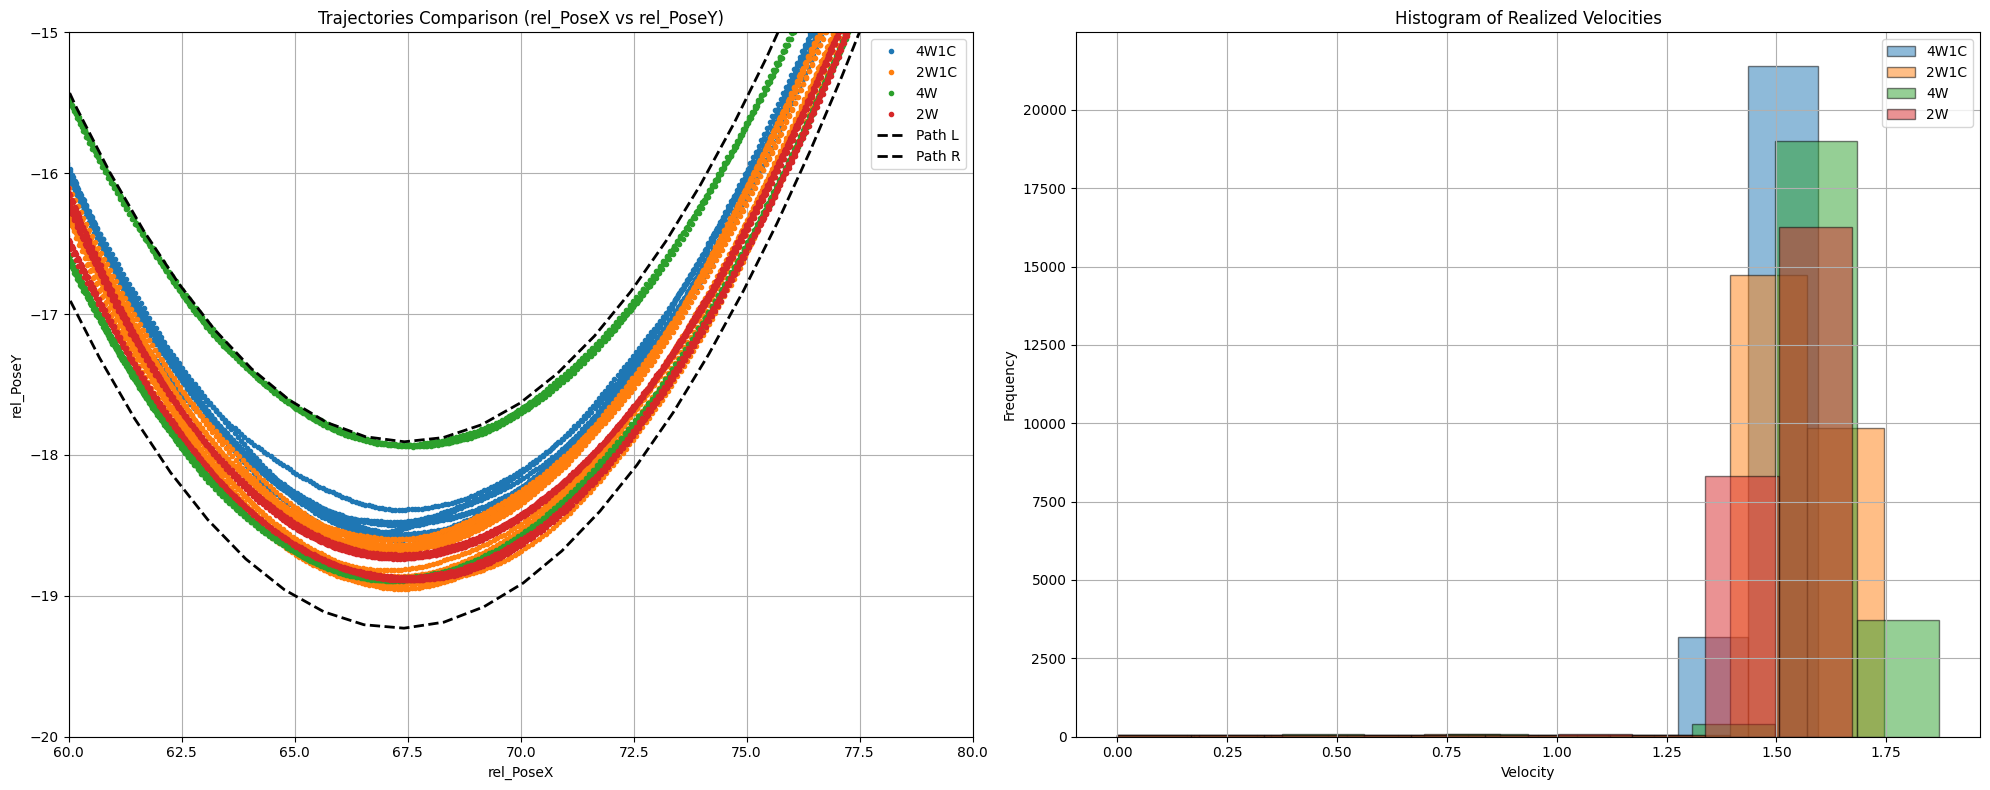

In [15]:
import pickle
import os
import matplotlib.pyplot as plt
import pandas as pd

def extract_data(filepath):
    """Load data from the given file."""
    try:
        with open(filepath, "rb") as fp:
            print(f"Loading file: {filepath}")
            data = pickle.load(fp)
            return data
    except Exception as e:
        print(f"Error reading {filepath}: {e}")
        return []

# Define the base evaluation path
eval_path = '/home/asalvi/code_workspace/tmp/RedRes/Data4Plot/'

# Get all files in the directory (no assumption of extensions)
all_files = os.listdir(eval_path)

# Initialize a dictionary to organize files by specifier
file_dict = {}
for file in all_files:
    if "rel_poseX" in file or "rel_poseY" in file or "rel_vel_lin" in file:
        # Extract the common specifier (e.g., 2W1C, 2W)
        specifier = file.split("_rel_")[0]
        if specifier not in file_dict:
            file_dict[specifier] = {}
        if "rel_poseX" in file:
            file_dict[specifier]["poseX"] = os.path.join(eval_path, file)
        if "rel_poseY" in file:
            file_dict[specifier]["poseY"] = os.path.join(eval_path, file)
        if "rel_vel_lin" in file:
            file_dict[specifier]["vel_lin"] = os.path.join(eval_path, file)

# Initialize the figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Subplot 1: Trajectories (rel_poseX vs rel_poseY)
axes[0].set_title("Trajectories Comparison (rel_PoseX vs rel_PoseY)")
axes[0].set_xlabel("rel_PoseX")
axes[0].set_ylabel("rel_PoseY")

# Iterate over specifiers and plot their trajectories
for specifier, files in file_dict.items():
    if "poseX" in files and "poseY" in files:
        # Load the data for poseX and poseY
        rel_pose_x = extract_data(files["poseX"])
        rel_pose_y = extract_data(files["poseY"])
        
        # Check if data is valid
        if len(rel_pose_x) > 0 and len(rel_pose_y) > 0:
            # Plot the trajectory
            axes[0].plot(rel_pose_x, rel_pose_y, '.', label=specifier)
        else:
            print(f"Missing or invalid data for specifier: {specifier}")
    else:
        print(f"Missing poseX or poseY file for specifier: {specifier}")

# File paths for Two Lane Paths
file_L = "/home/asalvi/code_workspace/Husky_CS_SB3/SkidSteerRR/train/MixPathFlip/TwoLanePathL.csv"
file_R = "/home/asalvi/code_workspace/Husky_CS_SB3/SkidSteerRR/train/MixPathFlip/TwoLanePathR.csv"

# Load and plot Two Lane Paths
try:
    data_L = pd.read_csv(file_L, header=None)
    data_R = pd.read_csv(file_R, header=None)

    # Extract X and Y columns
    x_L, y_L = data_L[0], data_L[1]
    x_R, y_R = data_R[0], data_R[1]

    # Plot the two lane paths
    axes[0].plot(x_L, y_L, label="Path L", linestyle="--", linewidth=2, color="black")
    axes[0].plot(x_R, y_R, label="Path R", linestyle="--", linewidth=2, color="black")
except Exception as e:
    print(f"Error loading or plotting lane paths: {e}")

# Add legend and grid to trajectory plot
axes[0].legend()
axes[0].grid(True)
axes[0].set_xlim([60, 80])
axes[0].set_ylim([-20, -15])

# Subplot 2: Histogram of linear velocities (rel_vel_lin)
axes[1].set_title("Histogram of Realized Velocities")
axes[1].set_xlabel("Velocity")
axes[1].set_ylabel("Frequency")

# Collect velocities for the histogram
for specifier, files in file_dict.items():
    if "vel_lin" in files:
        # Load the data for vel_lin
        vel_lin = extract_data(files["vel_lin"])
        if len(vel_lin) > 0:
            # Plot the histogram
            axes[1].hist(vel_lin, bins=10, alpha=0.5, label=specifier, edgecolor='black')
        else:
            print(f"Missing or invalid velocity data for specifier: {specifier}")

# Add legend and grid to histogram
axes[1].legend()
axes[1].grid(True)

# Show the combined plots
plt.tight_layout()
plt.show()


Data contents: [17.352067700452192, 17.352057063277464, 17.35359273427538, 17.35961530187498, 17.367296734578417, 17.37666856729484, 17.387758705226833, 17.400575923164723, 17.41511951728009, 17.431391973978513, 17.449389534235156, 17.469115351701397, 17.4905696597634, 17.513751734521318, 17.538663347254673, 17.565301644619115, 17.593670553136516, 17.623473773378752, 17.654641109135984, 17.68695560622124, 17.71980117577775, 17.754058007041845, 17.7893638255281, 17.824505406802963, 17.860211209941973, 17.895186230175366, 17.930217078690195, 17.964319776985004, 17.99701651911851, 18.029063301007074, 18.059899346479543, 18.089396766040675, 18.11806175072617, 18.145665387058234, 18.172590495661826, 18.19942205186643, 18.22516105363276, 18.25068814778098, 18.27547851707216, 18.29920300479798, 18.321948779949082, 18.344173168025684, 18.36582694805585, 18.386284754310537, 18.406542988281753, 18.42595854560668, 18.444097129440763, 18.46130782497992, 18.477544504163323, 18.492887920264252, 18.5